In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import colorsys

VERBOSE = False
GRAPHICS = False

# Making a Social Network

## Useful Functions

In [2]:
# Generate colorscale
def generate_color_scale(degrees):
    color_scale = []
    for i in range(max(degrees)+1):
        if not (max(degrees)) == 0:
            scale = int(255 * ((i)/(max(degrees))))
        else:
            scale = 255
        rgb = (scale, 0, 255-scale)
        color_scale.append(rgb)

        if VERBOSE:
            print([int(color) for color in rgb])
            
    color_scale = ['#%02x%02x%02x' % rgb for rgb in color_scale]
    return color_scale

In [3]:
def generate_network_plots(G, pos = None):
    fig, axs = plt.subplots(2, 2, figsize=(15,12))
    
    # Degree for Each Node
    nx_degrees = dict(nx.degree(G))
    degrees_from_graph = list(nx_degrees.values())
    bin_degrees_from_graph = list(range(0, len(degrees_from_graph)))
    axs[0, 0].bar(bin_degrees_from_graph, height=degrees_from_graph)
    axs[0, 0].set_title('Degree for Each Node')
    
    axs[0,1].set_visible(False)
    
    # Frequency of Node Counts
    hist_data_preferential = nx.degree_histogram(G)
    bins = list(range(0, len(hist_data_preferential)))
    axs[1, 0].bar(bins, height=hist_data_preferential)
    axs[1, 0].set_title('Frequency of Node Counts')
    
    if pos is None:
        pos = nx.spring_layout(G)
    # Network Graph (Color = Degree)
    nx.draw(G, pos)
    color_scale = generate_color_scale(degrees_from_graph)
    for i in range(1, max(degrees_from_graph)):
        nodes_of_degree = []
        for j in range(0, len(degrees_from_graph)):
            if degrees_from_graph[j] == i:
                nodes_of_degree.append(j)
        nx.draw_networkx_nodes(G, pos, nodelist=nodes_of_degree, node_color=color_scale[i])
    plt.title("Network Graph (Color = Degree)")
        
    return fig

### Erdos-Renyi (Binomial)

In [4]:
# number of nodes
n = 20

# probability of edge
# 
# For erdos-renyi graph this is lamda/n where lambda is the
# mean value of edges for the network. Assuming we want the 
# average agent to have connections to 4 others, then we get:
p = 4/n

g = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

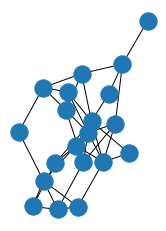

In [5]:
# look at it

plt.subplot(121)
nx.draw(g)

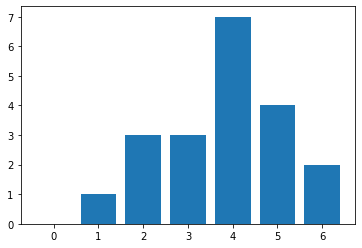

In [6]:
# look at a histogram for number of nodes
hist_data_erdos = nx.degree_histogram(g)
bins = list(range(0, len(hist_data_erdos)))

plt.bar(bins, height=hist_data_erdos)
plt.show()

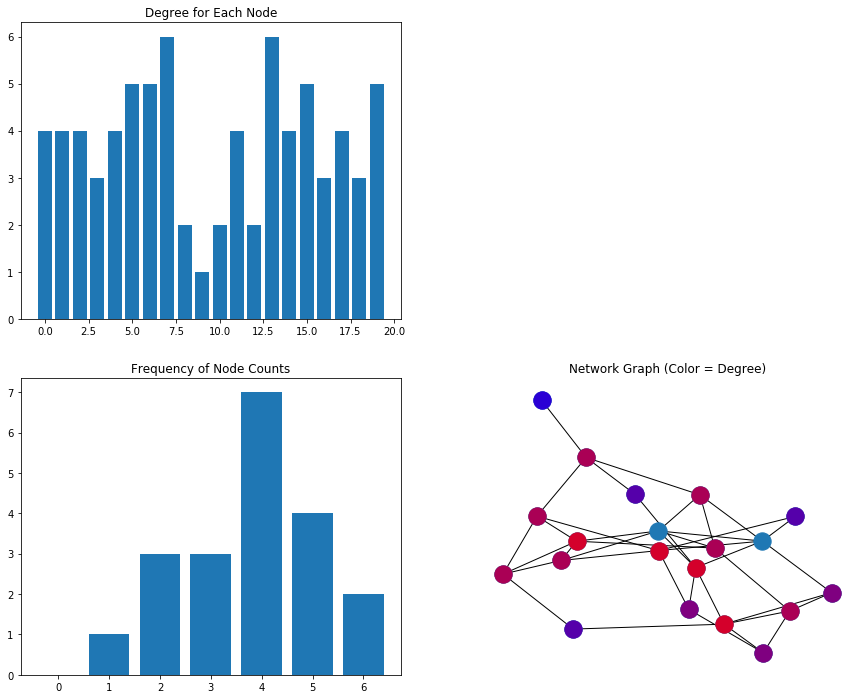

In [7]:
fig = generate_network_plots(g)
fname = "erdosRenyi"
fig.savefig("networkPlots/" + fname + ".png")

### Configuration Model

In [8]:
# get a degree sequence

In [9]:
# generate model from degree sequence

### Preferential Attatchment Model

Start with a single node, no edges. For each time step, `k`, add a node with `r` edges to the network. Each of these `r` edges are attatched randomly to existing nodes. The probability that an edge connects to a node is based on the degree of the node in question, thus giving preference to nodes with a high degree count already.

Continue the process until there are `n` nodes in the model.

In [10]:
# params
r = 3
n = 200

GRAPHICAL = False
VERBOSE = False

# start with single node, no edges
nodes = []
node_index = 1
nodes.append(node_index)
node_index += 1
edges = []
degrees = [0] * n

In [11]:
# generate the probabilities of an edge being attatched to a node
p = np.linspace(0, 1, n)

In [12]:
# generate initial condition

G = nx.trivial_graph()

plots_Pref = generate_network_plots(G)
fname = "pa0001"
plots_Pref.savefig("networkPlots/preferentialnodes200fixed/" + fname + ".png")
plt.close()

In [13]:
while (node_index < n):
    # new node
    nodes.append(node_index)
    
    # r edges, randomly attatched to existing nodes
    
    # if we don't have r nodes yet
    if (len(nodes) < r):
        for node in nodes:
            if node != node_index:
                chance = np.random.rand()
                degree_of_node = degrees[node]
            
                if (chance > p[degree_of_node]):
                    degrees[node] = degree_of_node + 1
                    degrees[node_index] += 1
                    
                    edge = (node_index, node)
                    
                    edges.append(edge)
    else:
        for i in range(0,r):
            # get a random node
            random_node_index = np.random.randint(node_index)
            node = nodes[random_node_index]
            
            if node != node_index:
                chance = np.random.rand()
                degree_of_node = degrees[node]
            
                if (chance > p[degree_of_node]):
                    degrees[node] = degree_of_node + 1
                    degrees[node_index] += 1
                    
                    edge = (node_index, node)
                    
                    edges.append(edge)
    
    
    if VERBOSE:
        print("Current state of network: ")
        print("\tNumber of nodes: {}".format(node_index))
        print("\tNodes: {}".format(nodes))
        print("\tEdges: {}".format(edges))
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    if GRAPHICAL:
        plt.figure()
        plt.plot()
        nx.draw(G)
        plt.show()
    
    #plots_Pref = generate_network_plots(G, pos)
    #fname = "pa" + str(node_index).rjust(4, "0")
    #plots_Pref.savefig("networkPlots/preferentialnodes200fixed/" + fname + ".png")
    #plt.close()
    
    node_index += 1
    
    

In [14]:
# save positions
pos = nx.spring_layout(G)

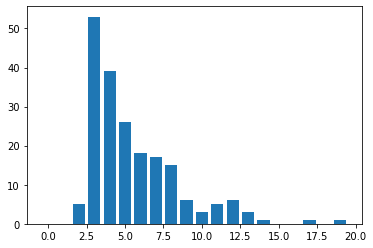

In [15]:
# look at a histogram for number of nodes
hist_data_preferential = nx.degree_histogram(G)
bins = list(range(0, len(hist_data_preferential)))

plt.bar(bins, height=hist_data_preferential)
plt.show()

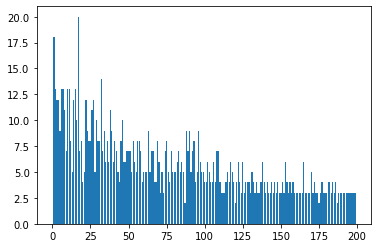

In [16]:
# Mediocre version of degrees per node
binsDegrees = list(range(0, len(degrees)))

plt.bar(binsDegrees, height=degrees)
plt.show()

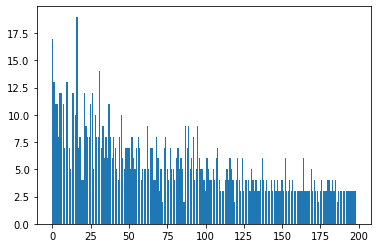

In [17]:
# Way better way of graphing degree per node in graph
nx_degrees = dict(nx.degree(G))

degrees_from_graph = list(nx_degrees.values())

bin_degrees_from_graph = list(range(0, len(degrees_from_graph)))

plt.bar(bin_degrees_from_graph, height=degrees_from_graph)
plt.show()

In [18]:
nx_degrees = dict(nx.degree(g))
degrees_from_graph = list(nx_degrees.values())

color_scale = generate_color_scale(degrees_from_graph)

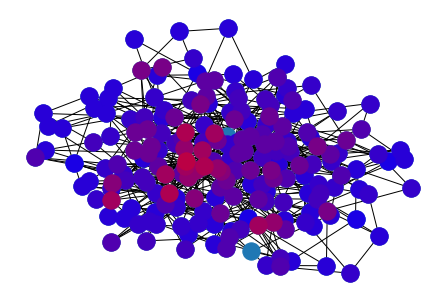

In [19]:
pos = nx.spring_layout(G)

# Draw the graph, but don't color the nodes
nx.draw(G, pos)

nx_degrees = dict(nx.degree(G))
degrees_from_graph = list(nx_degrees.values())

VERBOSE = False

for i in range(1, max(degrees_from_graph)):
    nodes_of_degree = []
    
    if VERBOSE:
        print("looking for nodes of degree {}".format(i))
    
    for j in range(1, len(degrees_from_graph)):
        if degrees_from_graph[j] == i:
            if VERBOSE:
                print("node {} has degree {}".format(j, i))
            nodes_of_degree.append(j)
    
    if VERBOSE:
        print("will draw nodes {} color {}".format(nodes_of_degree, color_scale[i]))
    
    #print(nodes_to_draw, nodes_of_degree)
    color_scale = generate_color_scale(degrees_from_graph)
    
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_of_degree, node_color=color_scale[i])

plt.show()

### Small World Model

WIP